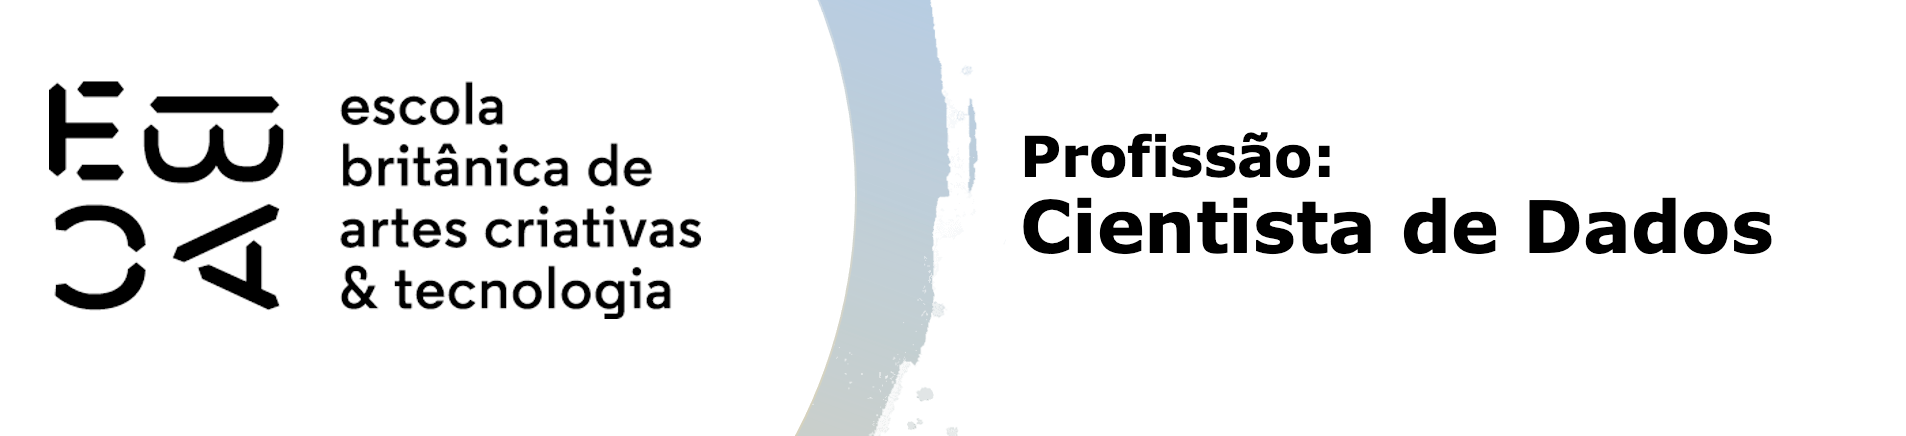

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [2]:
df.shape

(187646, 13)

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [6]:
df2020 = df.loc[df['Ano']==2020]
df1 = df2020.loc[df2020['flag_credito']>0].groupby('categoria')['categoria'].describe()
df1[['freq']]
df2 = df2020.loc[df2020['flag_credito']==0].groupby('categoria')['categoria'].describe()
df2[['count']]
df3 = pd.concat([df1[['freq']], df2[['count']]], axis=1)
df3.rename(columns = {'freq':'retorno_crédito', 'count':'sem_retorno'}, inplace=True)
df3['total_NF'] = df3.retorno_crédito + df3.sem_retorno
df3['probabilidade_retorno'] = df3.retorno_crédito/df3.total_NF
df3 = df3.reset_index()
df3

,categoria,retorno_crédito,sem_retorno,total_NF,probabilidade_retorno
0,Alimentos,1720,778,2498,0.688551
1,Auto posto,73,195,268,0.272388
2,Construção,3448,4262,7710,0.447211
3,Farmácia,1213,3669,4882,0.248464
4,Mercado,6182,7617,13799,0.448003
5,Restaurantes,953,237,1190,0.80084
6,Varejo,362,1886,2248,0.161032
7,Vestuário,202,657,859,0.235157
8,não definido,3361,5385,8746,0.38429


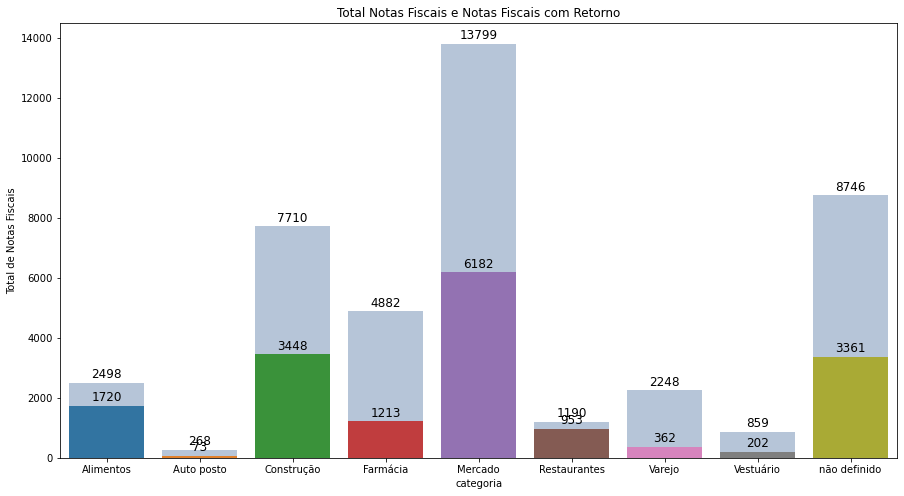

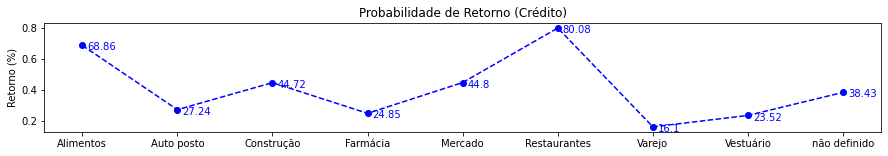

In [68]:
fig, ax = plt.subplots(figsize=(15,8))

plot= sns.barplot(x='categoria', y ='total_NF', data=df3, color='lightsteelblue')
plot= sns.barplot(x='categoria', y = 'retorno_crédito', data=df3)
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha='center', va='baseline', fontsize = 12, color = 'black',
                  xytext=(0, 5), textcoords = 'offset points')
ax.set_ylabel('Total de Notas Fiscais')
plt.title('Total Notas Fiscais e Notas Fiscais com Retorno')
plt.show()

fig, ax = plt.subplots(figsize=(15,2))
ax.plot('categoria', 'probabilidade_retorno','--o',color='blue', data=df3)
x= df3.categoria
y=df3.probabilidade_retorno
label= round((df3.probabilidade_retorno).astype(float)*100,2)
for label, x, y in zip(label, x, y):
    plt.annotate(label,
                 xy=(x,y),
                 xytext=(5,-5),
                 textcoords= 'offset points', 
                color='blue')
ax.set_ylabel('''Retorno (%)''')
plt.title('Probabilidade de Retorno (Crédito)')
plt.show()


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [28]:
tab = pd.crosstab(df2020.categoria, df2020.flag_credito, margins=True, margins_name= 'total')
tab['return probability'] = tab[1]/tab['total']
tab['odds'] = tab[1]/tab[0]
tab['odds_ratio'] = tab['odds']/tab.loc['total', 'odds']
tab['WOE'] = np.log(tab.odds_ratio)
tab

flag_credito,0,1,total,return probability,odds,odds_ratio,WOE
categoria,,,,,,,
Alimentos,778,1720,2498,0.688551,2.210797,3.116120,1.136589
Auto posto,195,73,268,0.272388,0.374359,0.527659,-0.639304
Construção,4262,3448,7710,0.447211,0.809010,1.140300,0.131292
Farmácia,3669,1213,4882,0.248464,0.330608,0.465992,-0.763587
Mercado,7617,6182,13799,0.448003,0.811606,1.143959,0.134495
Restaurantes,237,953,1190,0.800840,4.021097,5.667740,1.734790
Varejo,1886,362,2248,0.161032,0.191941,0.270540,-1.307334
Vestuário,657,202,859,0.235157,0.307458,0.433363,-0.836181
não definido,5385,3361,8746,0.384290,0.624141,0.879728,-0.128143


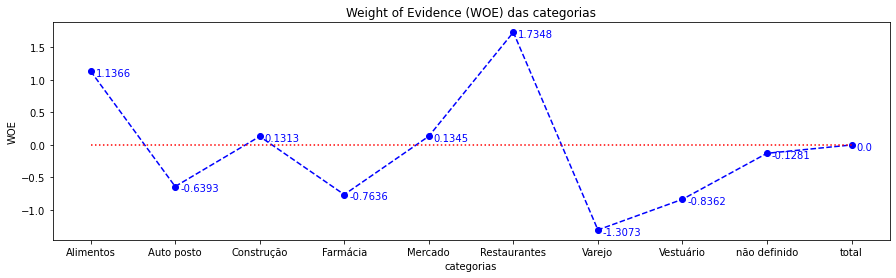

In [67]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(tab.index, tab.WOE,'--o',color='blue', data=tab)
x = list(tab.index)
y = tab.WOE
label= round(tab.WOE,4)
for label, x, y in zip(label, x, y):
    plt.annotate(label,
                 xy=(x,y),
                 xytext=(5,-5),
                 textcoords= 'offset points', 
                color='blue')
ax.hlines(y = 0, xmin = 'Alimentos', xmax = 'total', colors='r', linestyles='dotted')
ax.set_ylabel('WOE')
ax.set_xlabel('categorias')
plt.title('Weight of Evidence (WOE) das categorias')

plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [74]:
evento = tab.columns[1]
n_evento = tab.columns[0]

In [78]:
tab['pct_evento'] = tab[evento]/tab.loc['total',evento]
tab['pct_nao_evento'] = tab[n_evento]/tab.loc['total',n_evento]
tab['woe_contra_prova'] = np.log(tab.pct_evento/tab.pct_nao_evento)
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.WOE
print(tab.iv_parcial.sum())
tab

0.3145161393017443


flag_credito,0,1,total,return probability,odds,odds_ratio,WOE,pct_evento,pct_nao_evento,woe_contra_prova,iv_parcial
categoria,,,,,,,,,,,
Alimentos,778,1720,2498,0.688551,2.210797,3.116120,1.136589,0.098207,0.031516,1.136589,0.075801
Auto posto,195,73,268,0.272388,0.374359,0.527659,-0.639304,0.004168,0.007899,-0.639304,0.002385
Construção,4262,3448,7710,0.447211,0.809010,1.140300,0.131292,0.196871,0.172648,0.131292,0.003180
Farmácia,3669,1213,4882,0.248464,0.330608,0.465992,-0.763587,0.069259,0.148627,-0.763587,0.060604
Mercado,7617,6182,13799,0.448003,0.811606,1.143959,0.134495,0.352975,0.308555,0.134495,0.005974
Restaurantes,237,953,1190,0.800840,4.021097,5.667740,1.734790,0.054414,0.009601,1.734790,0.077741
Varejo,1886,362,2248,0.161032,0.191941,0.270540,-1.307334,0.020669,0.076400,-1.307334,0.072858
Vestuário,657,202,859,0.235157,0.307458,0.433363,-0.836181,0.011534,0.026614,-0.836181,0.012610
não definido,5385,3361,8746,0.384290,0.624141,0.879728,-0.128143,0.191904,0.218140,-0.128143,0.003362


In [80]:
((tab.pct_evento - tab.pct_nao_evento)*tab.WOE).sum()

0.3145161393017443

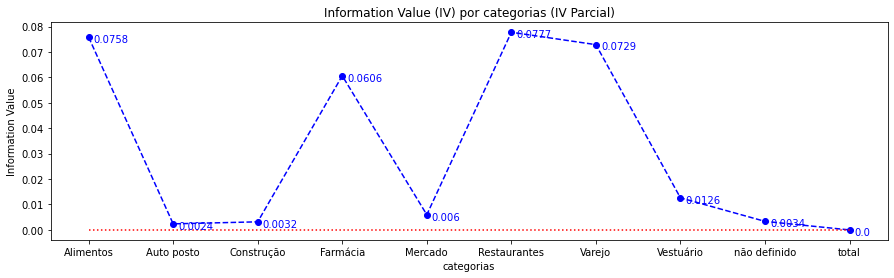

In [81]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(tab.index, tab.iv_parcial,'--o',color='blue', data=tab)
x = list(tab.index)
y = tab.iv_parcial
label= round(tab.iv_parcial,4)
for label, x, y in zip(label, x, y):
    plt.annotate(label,
                 xy=(x,y),
                 xytext=(5,-5),
                 textcoords= 'offset points', 
                color='blue')
ax.hlines(y = 0, xmin = 'Alimentos', xmax = 'total', colors='r', linestyles='dotted')
ax.set_ylabel('Information Value')
ax.set_xlabel('categorias')
plt.title('Information Value (IV) por categorias (IV Parcial)')

plt.show()

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<font color='blue'>No primeiro gráfico, verifca-se que as categorias Restaurante e Alimentos foram que apresentaram maior probabilidade de retorno (crédito), <font color='magenta'>80,08%</font> e <font color='magenta'>68,86%</font>, respectivamente.</font>

<font color='blue'>No segundo gráfico (WOE), pode verificar que as categorias Restaurante e Alimentos apresentaram maiores índices WOE (<font color='magenta'>1.734790</font> e <font color='magenta'>1.136589</font>), o que demonstram serem as variáveis com maior relevência para demonstrar o evento crédito. Cabe salientar que a categoria Varejo (<font color='magenta'>-1.307334</font>) apresentou índice maior negativa, o que demonstra relevância para demonstrar o não evento (pior setor para se obter crédito). Categoria Construção e Varejo apresentaram o índice WOE próximo de zero, o que demonstra pouca relevência para demonstrar o evento crédito ou não, isto se justifica pela probabilidade de retorno próximo de 50% do total de notas fiscais analisadas.</font>

<font color='blue'>No terceiro gráfico (IV-Parcial), verificou-se que as categorias Restaurante, Alimentos e Varejos são as melhores categorias com poder preditivo do evento (<font color='magenta'>0.077741</font>, <font color='magenta'>0.075801</font>, <font color='magenta'>0.072858</font>), mantendo-se certa coerência com o verificado no gráfico WOE.</font>
